<a href="https://colab.research.google.com/github/Kavi91/MM-Project-MEx_Classification/blob/main/project_work_MEx_classification_Group_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s):  

  Kavinda Rathnayaka

  Shalika Kande Widanalage

  Student number(s):  

  2305410

  2305411

## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br>
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location

loc = "./MEx"

In [2]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
#paths_record = Path(loc).glob("*/*/*.csv")
paths_record = sorted(Path(loc).glob("*/*/*.csv"))# Linux OS

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)

    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df

    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [3]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""

# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.

for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())

    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue

        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()

        records_windowed.append(tmp_data)

df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


<a id='task1'></a>
<div class=" alert alert-warning">
     
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>

</div>

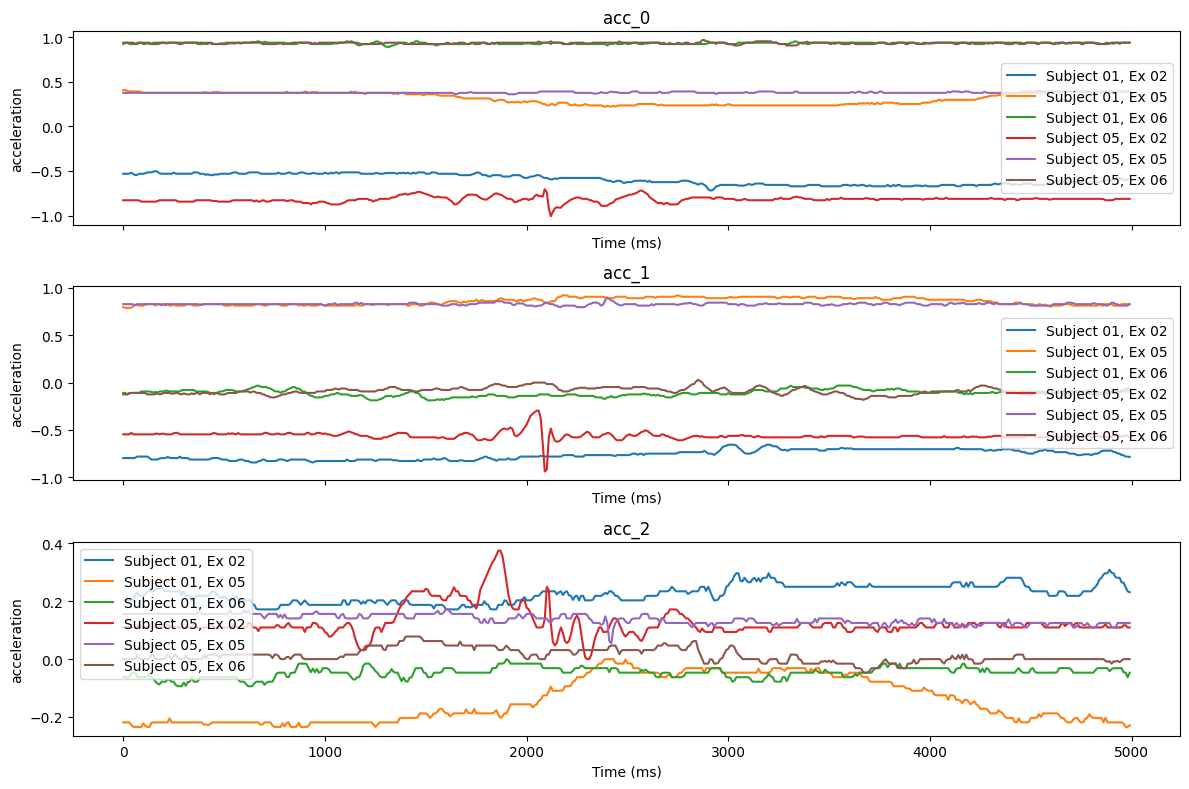

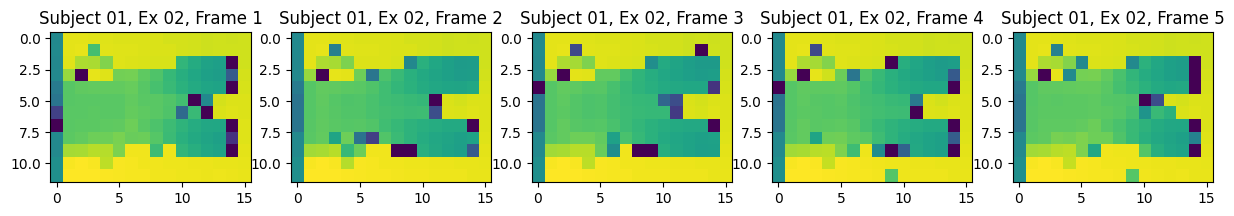

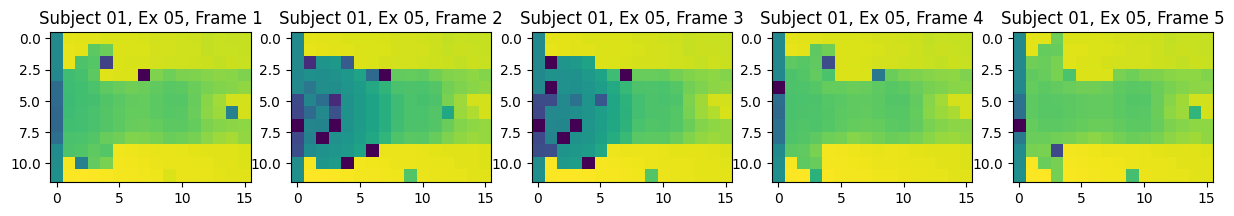

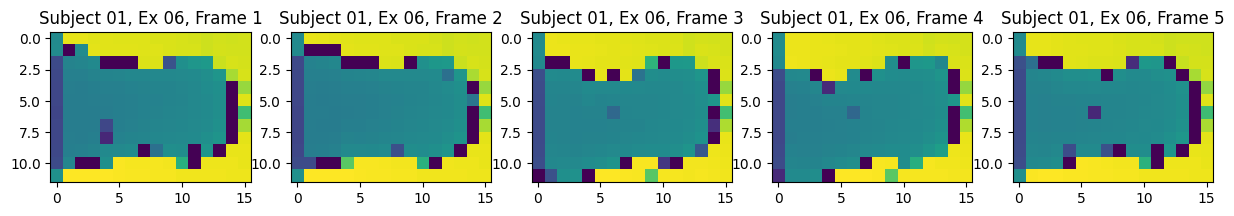

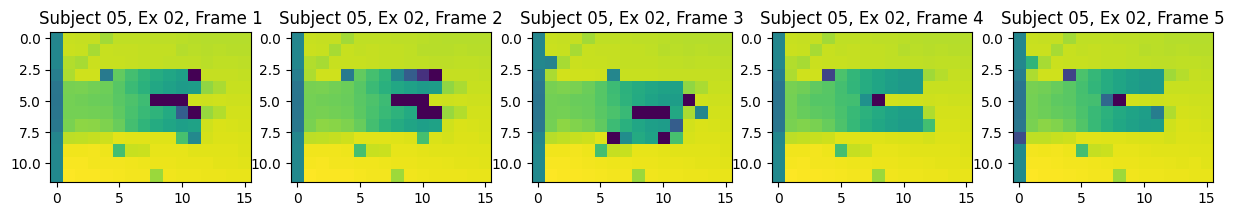

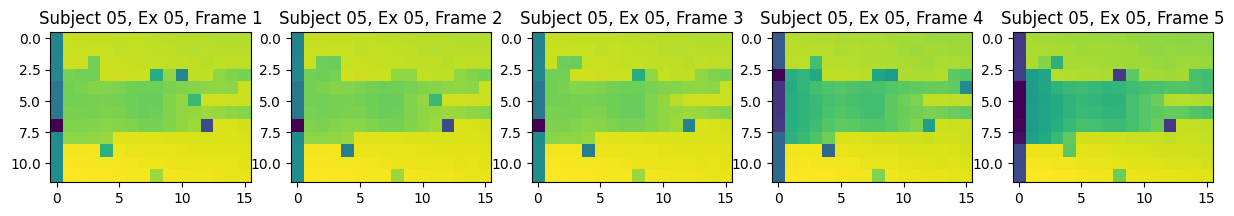

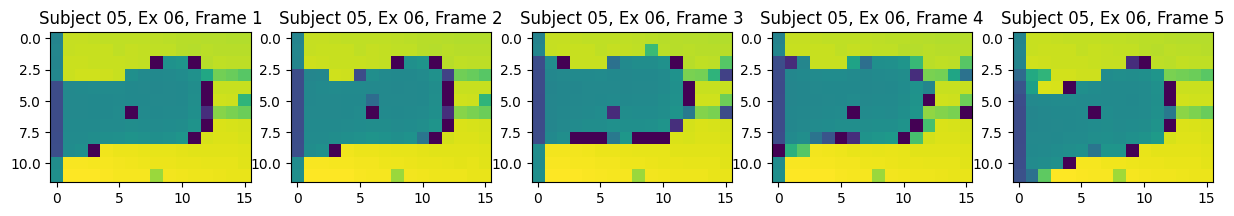

In [4]:
# 1.1. Visualize selected samples for both modalities

### Your code begins here ###
import matplotlib.pyplot as plt

exercise_set = ['02', '05', '06']
subject_set = ['01', '05']

acc_sample = df_records_windowed[df_records_windowed['sensor'] == 'acc']
dc_sample = df_records_windowed[df_records_windowed['sensor'] == 'dc']

fig, axs = plt.subplots(3, figsize=(12, 8), sharex=True)
axs[0].set_title('acc_0')
axs[1].set_title('acc_1')
axs[2].set_title('acc_2')

for subject in subject_set:
    for ex_id in exercise_set:
        acc_data = acc_sample[(acc_sample["subject_id"] == subject) & (acc_sample["exercise_id"] == ex_id)]
        acc_plot_data = acc_data['df'].iloc[0]
        axs[0].plot(acc_plot_data['time'], acc_plot_data['acc_0'], label=f'Subject {subject}, Ex {ex_id}')
        axs[1].plot(acc_plot_data['time'], acc_plot_data['acc_1'], label=f'Subject {subject}, Ex {ex_id}')
        axs[2].plot(acc_plot_data['time'], acc_plot_data['acc_2'], label=f'Subject {subject}, Ex {ex_id}')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('acceleration')
plt.tight_layout()
plt.show()

for i, (subject, ex_id) in enumerate([(s, e) for s in subject_set for e in exercise_set]): #S
    dc_data = dc_sample[(dc_sample["subject_id"] == subject) & (dc_sample["exercise_id"] == ex_id)] #S
    dc_plot_data = dc_data['df'].iloc[0].to_numpy() #S
    dc_plot_data = dc_plot_data[:, 1:].reshape(5, 12, 16) #S

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))

    for j in range(5):
        axs[j].imshow(dc_plot_data[j])
        axs[j].set_title(f'Subject {subject}, Ex {ex_id}, Frame {j+1}')
plt.show()

### Your code ends here ###

<a id='task1'></a>
<div class=" alert alert-warning">

<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
  
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

  Number of training sets: 1486
  acc_dim: (500, 3)
  dc_dim: (5, 192)
  Number of testing sets: 598
  acc_dim: (500, 3)
  dc_dim: (5, 192)


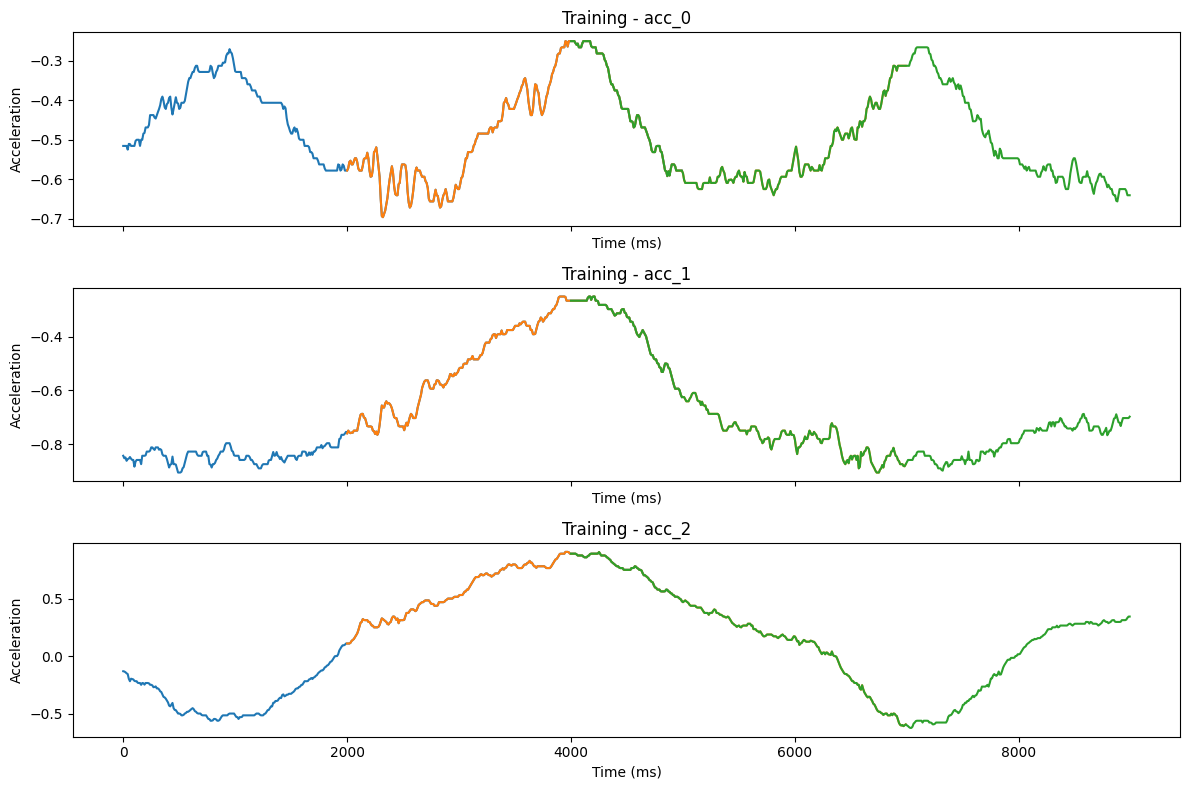

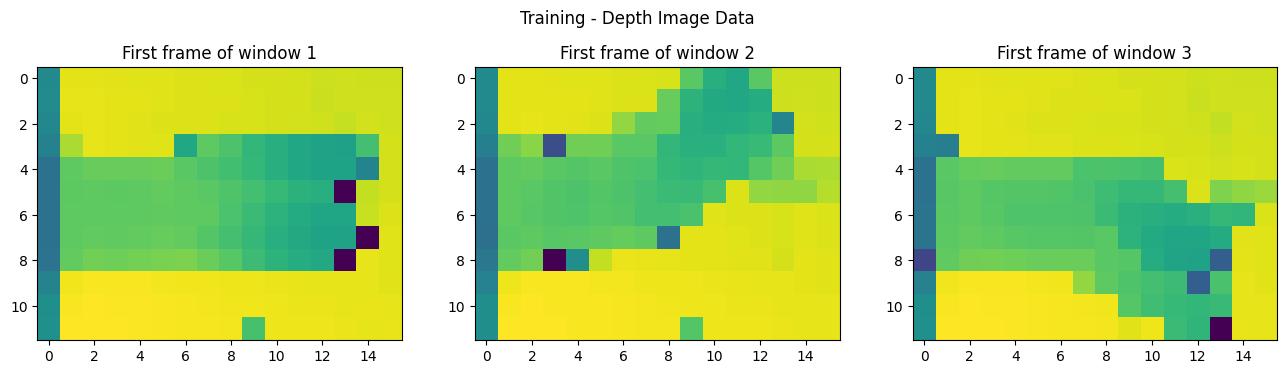

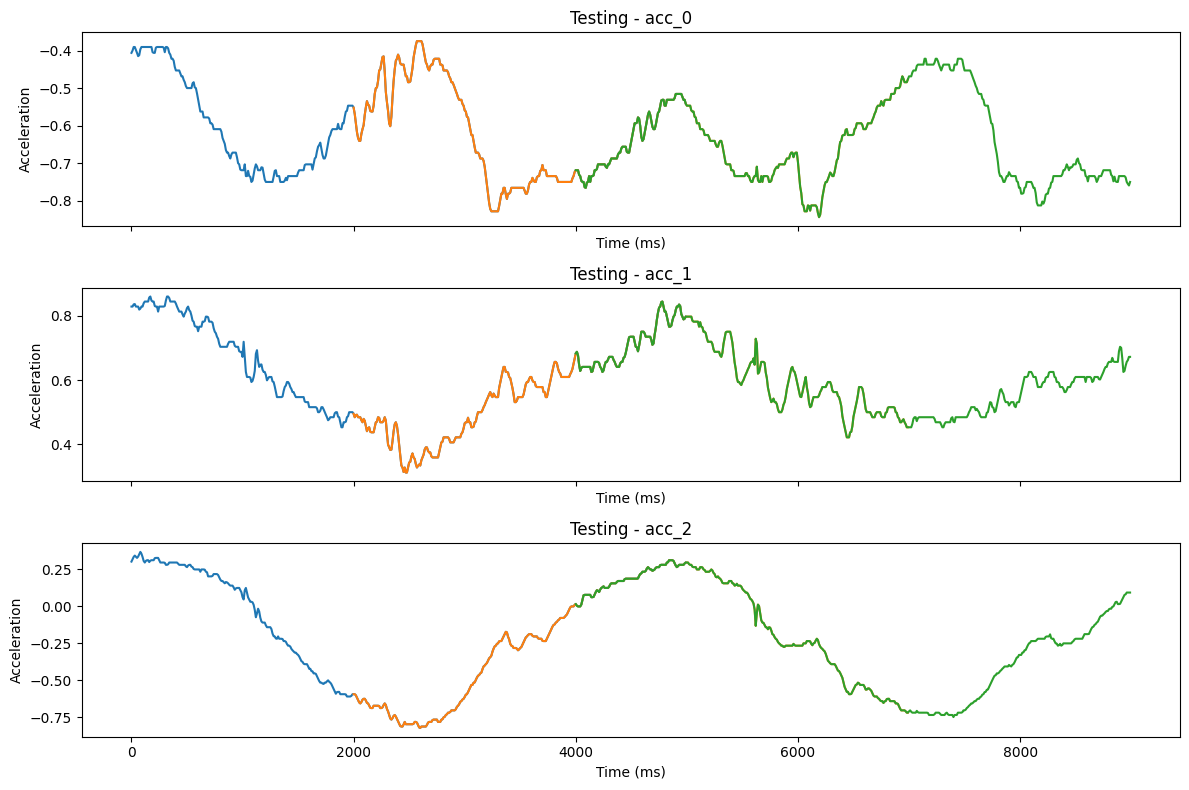

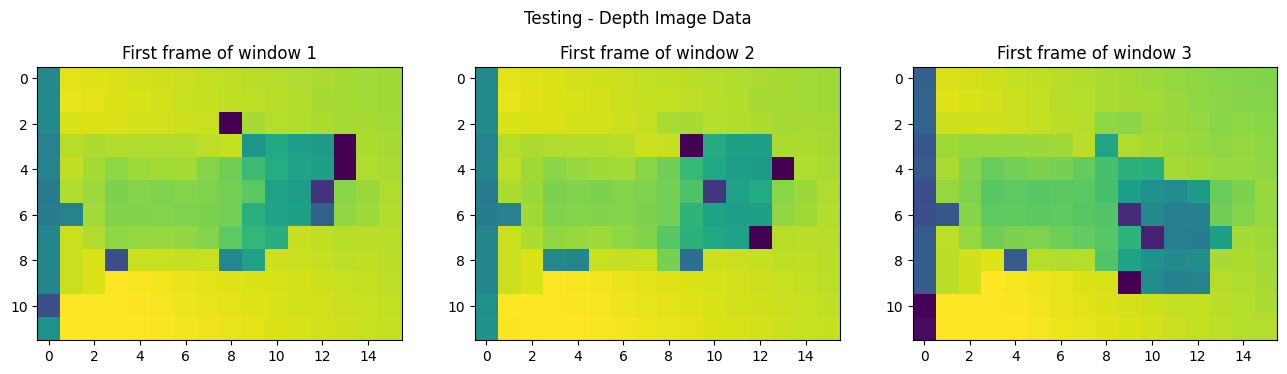

In [5]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

### Your code begins here ###
training_subjects = ['01', '02','03', '04','05', '06','07']
testing_subjects = ['08', '09','10']

train_data = df_records_windowed[df_records_windowed['subject_id'].isin(training_subjects)]
test_data = df_records_windowed[df_records_windowed['subject_id'].isin(testing_subjects)]

train_acc = train_data[train_data["sensor"] == "acc"]
train_dc = train_data[train_data["sensor"] == "dc"]

acc_data = train_acc[["subject_id", "exercise_id", "trial", "window_idx", "sensor", "df"]]
dc_data = train_dc[["subject_id", "exercise_id", "trial", "window_idx", "sensor", "df"]]

paired_train_data = acc_data.merge(
    dc_data,
    on=["subject_id", "exercise_id", "trial", "window_idx"],
    suffixes=('_acc', '_dc'),
    how='inner'
)

train_count = len(paired_train_data)
test_count = len(test_data) // 2 # test_data count sum of acc and dc both windows separatly so need to devide by 2

print(f"  Number of training sets: {train_count}")
print(f"  acc_dim: {train_acc.iloc[0]['df'].iloc[:, 1:].shape}") # dimension without time
#print(f"  acc_dim: {train_acc.iloc[0]['df'].shape}") # dimension with time
print(f"  dc_dim: {train_dc.iloc[0]['df'].iloc[:, 1:].shape}")

print(f"  Number of testing sets: {test_count}")
print(f"  acc_dim: {test_data[test_data['sensor'] == 'acc'].iloc[0]['df'].iloc[:, 1:].shape}")
print(f"  dc_dim: {test_data[test_data['sensor'] == 'dc'].iloc[0]['df'].iloc[:, 1:].shape}")

acc_sample = paired_train_data[["df_acc"]].iloc[:3]
dc_sample = paired_train_data[["df_dc"]].iloc[:3]

fig, axs = plt.subplots(3, figsize=(12, 8), sharex=True)
axs[0].set_title("Training - acc_0")
axs[1].set_title("Training - acc_1")
axs[2].set_title("Training - acc_2")

for i, row in acc_sample.iloc[:3].iterrows():
    acc_data = row["df_acc"]
    axs[0].plot(acc_data["time"], acc_data["acc_0"])
    axs[1].plot(acc_data["time"], acc_data["acc_1"])
    axs[2].plot(acc_data["time"], acc_data["acc_2"])

for ax in axs:
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Acceleration")
plt.tight_layout()
plt.show()

num_samples = min(len(dc_sample), 3)
fig, axs = plt.subplots(1, num_samples, figsize=(16, 4))

for i, ax in enumerate(axs):
    dc_data = dc_sample.iloc[i]["df_dc"].to_numpy()[:, 1:].reshape(5, 12, 16) #S
    ax.imshow(dc_data[0])
    ax.set_title(f"First frame of window {i+1}")

plt.suptitle("Training - Depth Image Data")
plt.show()

acc_sample = test_data[test_data["sensor"] == "acc"]
dc_sample = test_data[test_data["sensor"] == "dc"]

fig, axs = plt.subplots(3, figsize=(12, 8), sharex=True)
axs[0].set_title("Testing - acc_0")
axs[1].set_title("Testing - acc_1")
axs[2].set_title("Testing - acc_2")

for i, row in acc_sample.iloc[:3].iterrows():
    acc_data = row["df"]
    axs[0].plot(acc_data["time"], acc_data["acc_0"])
    axs[1].plot(acc_data["time"], acc_data["acc_1"])
    axs[2].plot(acc_data["time"], acc_data["acc_2"])

for ax in axs:
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Acceleration")
plt.tight_layout()
plt.show()

num_samples = min(len(dc_sample), 3)
fig, axs = plt.subplots(1, num_samples, figsize=(16, 4))

for i, ax in enumerate(axs):
    dc_data = dc_sample.iloc[i]["df"].to_numpy()[:, 1:].reshape(5, 12, 16) #S
    ax.imshow(dc_data[0])
    ax.set_title(f"First frame of window {i+1}")

plt.suptitle("Testing - Depth Image Data")
plt.show()

### Your code ends here ###

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

F1 Score: 0.41
Confusion Matrix:


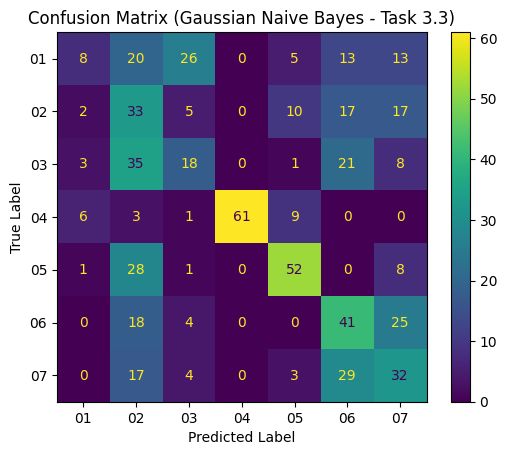

In [6]:
# 2.1

### Your code begins here ###
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from scipy.signal import resample
from sklearn.metrics import confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay

train_labels_acc = paired_train_data[(paired_train_data['sensor_acc'] == 'acc')]['exercise_id'].to_numpy()
test_labels_acc = test_data[(test_data['sensor'] == 'acc')]['exercise_id'].to_numpy()

# Down sample the data
def preprocess_act(data):
    acc = resample(data[['acc_0', 'acc_1', 'acc_2']].to_numpy(), 125, t=data['time'].to_numpy())
    return acc[0]

# Standardize the training data
train_data_acc = np.stack(paired_train_data[paired_train_data['sensor_acc'] == 'acc']['df_acc'].apply(
    lambda x: preprocess_act(x)
).to_numpy())

train_data_acc = train_data_acc.reshape(train_data_acc.shape[0], -1)  # Reshape and fit the scaler

scaler = StandardScaler()
train_data_acc = scaler.fit_transform(train_data_acc)  # Fit and transform training data

# Fit
pca = PCA(n_components=5)
lda = LDA(n_components=5)

train_pca = pca.fit_transform(train_data_acc)
train_lda = lda.fit_transform(train_data_acc, train_labels_acc)

# Standardize test data using the training scaler
test_data_acc = np.stack(test_data[test_data['sensor'] == 'acc']['df'].apply(
    lambda x: preprocess_act(x)
).to_numpy())

test_data_acc = test_data_acc.reshape(test_data_acc.shape[0], -1)
test_data_acc = scaler.transform(test_data_acc)

# Transform test data using PCA and LDA
test_pca = pca.transform(test_data_acc)
test_lda = lda.transform(test_data_acc)

# Concatenate PCA and LDA
train_concat_acc = np.hstack((train_pca, train_lda))
test_concat_acc = np.hstack((test_pca, test_lda))


predictions = []
for i in range(test_concat_acc.shape[0]):
    # distances
    pca_dist = np.linalg.norm(train_concat_acc[:, :5] - test_concat_acc[i, :5], axis=1)
    lda_dist = np.linalg.norm(train_concat_acc[:, 5:] - test_concat_acc[i, 5:], axis=1)

    # Normalize distances
    pca_dist_norm = (pca_dist - pca_dist.min()) / (pca_dist.max() - pca_dist.min())
    lda_dist_norm = (lda_dist - lda_dist.min()) / (lda_dist.max() - lda_dist.min())

    # Fusion
    fused_dist = (pca_dist_norm + lda_dist_norm) / 2

    nearest_idx = np.argmin(fused_dist)
    predictions.append(train_labels_acc[nearest_idx])


cm_acc = confusion_matrix(test_labels_acc, predictions)
f1_acc = f1_score(test_labels_acc, predictions, average='macro')

print(f"F1 Score: {f1_acc:.2f}")
print("Confusion Matrix:")


ConfusionMatrixDisplay(confusion_matrix=cm_acc, display_labels=np.unique(test_labels_acc)).plot(
    cmap="viridis", values_format="d")
plt.title('Confusion Matrix (Gaussian Naive Bayes - Task 3.3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Your code ends here ###

<a id='task2'></a>
<div class=" alert alert-warning">
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

F1 Score: 0.43
Confusion Matrix:


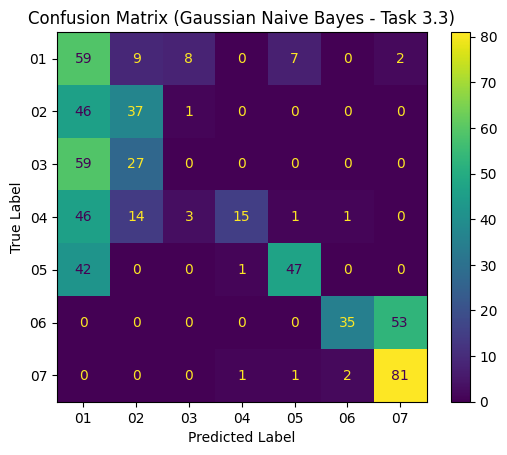

In [7]:
2.2

### Your code begins here ###

train_labels_dc = paired_train_data[(paired_train_data['sensor_dc'] == 'dc')]['exercise_id'].to_numpy()
test_labels_dc = test_data[test_data['sensor'] == 'dc']['exercise_id'].to_numpy()

def preprocess_depth(data):
    reshaped_data = data.to_numpy()[:, 1:].reshape(-1, 12 * 16)
    return reshaped_data


train_data_dc = np.stack(
    paired_train_data[paired_train_data['sensor_dc'] == 'dc']['df_dc'].apply(
        lambda x: preprocess_depth(x)
    ).to_numpy()
)

train_data_dc_flat = train_data_dc.reshape(train_data_dc.shape[0], -1)

# standardize training data
scaler_dc = StandardScaler()
train_data_dc_flat = scaler_dc.fit_transform(train_data_dc_flat)

# Fit
pca_dc = PCA(n_components=5)
lda_dc = LDA(n_components=5)
train_pca = pca_dc.fit_transform(train_data_dc_flat)
train_lda = lda_dc.fit_transform(train_data_dc_flat, train_labels_dc)

# Concatenate
train_concat_dc = np.hstack((train_pca, train_lda))

test_data_dc = np.stack(
    test_data[test_data['sensor'] == 'dc']['df'].apply(
        lambda x: preprocess_depth(x)
    ).to_numpy()
)

test_data_dc_flat = test_data_dc.reshape(test_data_dc.shape[0], -1)

# Standardize test data using the same scaler
test_data_dc_flat = scaler_dc.transform(test_data_dc_flat)

# Transform test data
test_pca = pca_dc.transform(test_data_dc_flat)
test_lda = lda_dc.transform(test_data_dc_flat)

# Concatenate test data
test_concat_dc = np.hstack((test_pca, test_lda))

predictions = []
for i in range(test_concat_dc.shape[0]):
    # distances
    pca_dist = np.linalg.norm(train_concat_dc[:, :5] - test_concat_dc[i, :5], axis=1)
    lda_dist = np.linalg.norm(train_concat_dc[:, 5:] - test_concat_dc[i, 5:], axis=1)

    # Normalize
    pca_dist_norm = (pca_dist - pca_dist.min()) / (pca_dist.max() - pca_dist.min())
    lda_dist_norm = (lda_dist - lda_dist.min()) / (lda_dist.max() - lda_dist.min())

    # Fusion
    fused_dist = (pca_dist_norm + lda_dist_norm) / 2

    # Find nearest neighbor
    nearest_idx = np.argmin(fused_dist)
    predictions.append(train_labels_dc[nearest_idx])

cm_dc = confusion_matrix(test_labels_dc, predictions)
f1_dc = f1_score(test_labels_dc, predictions, average='macro')

print(f"F1 Score: {f1_dc:.2f}")
print("Confusion Matrix:")


ConfusionMatrixDisplay(confusion_matrix=cm_dc, display_labels=np.unique(test_labels_acc)).plot(
    cmap="viridis", values_format="d")
plt.title('Confusion Matrix (Gaussian Naive Bayes - Task 3.3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Your code ends here ###

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   

<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>

Document your work.
    
</div>

In [8]:
# 3.1

### Your code begins here ###

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



class AccelerometerFeatureExtractor:
    def __init__(self, train_data, test_data, train_labels, test_labels):
        self.train_data = train_data
        self.test_data = test_data
        self.train_labels = train_labels
        self.test_labels = test_labels

        self.train_preprocessed = None
        self.test_preprocessed = None
        self.train_transformed_pca = None
        self.test_transformed_pca = None
        self.train_stat_features = None
        self.test_stat_features = None
        self.train_combined_features = None
        self.test_combined_features = None

        self.scaler = StandardScaler()

        # Initialize PCA models for each axis
        self.pca_x = PCA(n_components=10)
        self.pca_y = PCA(n_components=10)
        self.pca_z = PCA(n_components=10)

    def preprocess_accelerometer(self, data):
        """Preprocess accelerometer data by resampling."""
        from scipy.signal import resample
        acc = resample(data[['acc_0', 'acc_1', 'acc_2']].to_numpy(), 125, t=data['time'].to_numpy())
        return acc[0]

    def preprocess_data(self):
        """Apply preprocessing to the raw data."""
        self.train_data.loc[self.train_data['sensor_acc'] == 'acc', 'df_acc'] = self.train_data[
            self.train_data['sensor_acc'] == 'acc']['df_acc'].apply(self.preprocess_accelerometer)
        self.train_preprocessed = np.stack(
            self.train_data[self.train_data['sensor_acc'] == 'acc']['df_acc'].apply(lambda x: x[:, :]).to_numpy()
        )

        self.test_data.loc[self.test_data['sensor'] == 'acc', 'df'] = self.test_data[
            self.test_data['sensor'] == 'acc']['df'].apply(self.preprocess_accelerometer)
        self.test_preprocessed = np.stack(
            self.test_data[self.test_data['sensor'] == 'acc']['df'].apply(lambda x: x[:, :]).to_numpy()
        )

        num_train_samples, num_timesteps, num_features = self.train_preprocessed.shape
        num_test_samples = self.test_preprocessed.shape[0]

        # Reshape for standardization
        self.train_preprocessed = self.train_preprocessed.reshape(-1, num_features)
        self.test_preprocessed = self.test_preprocessed.reshape(-1, num_features)

        # Fit scaler on training data and transform both train and test data
        self.train_preprocessed = self.scaler.fit_transform(self.train_preprocessed)
        self.test_preprocessed = self.scaler.transform(self.test_preprocessed)

        # Reshape back to original shape
        self.train_preprocessed = self.train_preprocessed.reshape(num_train_samples, num_timesteps, num_features)
        self.test_preprocessed = self.test_preprocessed.reshape(num_test_samples, num_timesteps, num_features)

    def apply_pca(self):
        """Apply PCA to accelerometer data."""
        self.pca_x.fit(self.train_preprocessed[:, :, 0])
        self.pca_y.fit(self.train_preprocessed[:, :, 1])
        self.pca_z.fit(self.train_preprocessed[:, :, 2])

        self.train_transformed_pca = np.zeros((self.train_preprocessed.shape[0], 10, 3))
        self.train_transformed_pca[:, :, 0] = self.pca_x.transform(self.train_preprocessed[:, :, 0])
        self.train_transformed_pca[:, :, 1] = self.pca_y.transform(self.train_preprocessed[:, :, 1])
        self.train_transformed_pca[:, :, 2] = self.pca_z.transform(self.train_preprocessed[:, :, 2])

        self.test_transformed_pca = np.zeros((self.test_preprocessed.shape[0], 10, 3))
        self.test_transformed_pca[:, :, 0] = self.pca_x.transform(self.test_preprocessed[:, :, 0])
        self.test_transformed_pca[:, :, 1] = self.pca_y.transform(self.test_preprocessed[:, :, 1])
        self.test_transformed_pca[:, :, 2] = self.pca_z.transform(self.test_preprocessed[:, :, 2])

    def extract_stat_features(self):
        """Extract statistical features from accelerometer data."""
        self.train_stat_features = np.zeros((self.train_preprocessed.shape[0], 6))
        self.test_stat_features = np.zeros((self.test_preprocessed.shape[0], 6))

        for i in range(3):
            self.train_stat_features[:, i] = np.mean(self.train_preprocessed[:, :, i], axis=1)
            self.train_stat_features[:, i + 3] = np.std(self.train_preprocessed[:, :, i], axis=1)

            self.test_stat_features[:, i] = np.mean(self.test_preprocessed[:, :, i], axis=1)
            self.test_stat_features[:, i + 3] = np.std(self.test_preprocessed[:, :, i], axis=1)

    def combine_features(self):
        """Combine PCA-transformed and statistical features."""
        self.train_combined_features = np.hstack(
            (self.train_transformed_pca.reshape(self.train_preprocessed.shape[0], -1), self.train_stat_features)
        )
        self.test_combined_features = np.hstack(
            (self.test_transformed_pca.reshape(self.test_preprocessed.shape[0], -1), self.test_stat_features)
        )

    def run(self):
        self.preprocess_data()
        self.apply_pca()
        self.extract_stat_features()
        self.combine_features()

        print(f"Train Combined Features Shape: {self.train_combined_features.shape}")
        print(f"Test Combined Features Shape: {self.test_combined_features.shape}")

        return self.train_combined_features, self.test_combined_features

print("Initializing Accelerometer Feature Extraction...")
feature_extractor = AccelerometerFeatureExtractor(
    train_data=paired_train_data,
    test_data=test_data,
    train_labels=train_labels_acc,
    test_labels=test_labels_acc,
)

train_combined_acc, test_combined_acc = feature_extractor.run()

### Your code ends here ###


Initializing Accelerometer Feature Extraction...
Train Combined Features Shape: (1486, 36)
Test Combined Features Shape: (598, 36)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>

Document your work.
    
</div>

In [9]:
# 3.2

### Your code begins here ###

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


class DepthImageProcessor:
    def __init__(self, n_components=10):

        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)

    @staticmethod
    def preprocess_depth_images(data):

        try:
            reshaped_data = data.to_numpy()[:, 1:].reshape(-1, 12 * 16)
            return reshaped_data
        except Exception as e:
            raise ValueError(f"Error in Input shape: {data.shape}. Error: {str(e)}")

    def fit_transform_train_data(self, train_data):

        train_dc_data_ori = train_data.loc[train_data['sensor_dc'] == 'dc', 'df_dc'].apply(
            lambda x: self.preprocess_depth_images(x)
        )
        train_data_dc = np.stack(train_dc_data_ori.to_numpy())
        train_data_dc_flat = train_data_dc.reshape(-1, train_data_dc.shape[-1])
        train_data_dc_std = self.scaler.fit_transform(train_data_dc_flat)
        train_transformed_pca_dc = self.pca.fit_transform(train_data_dc_std)
        return train_transformed_pca_dc.reshape(train_data_dc.shape[0], -1)

    def transform_test_data(self, test_data):

        test_dc_data_ori = test_data.loc[test_data['sensor'] == 'dc', 'df'].apply(
            lambda x: self.preprocess_depth_images(x)
        )
        test_data_dc = np.stack(test_dc_data_ori.to_numpy())
        test_data_dc_flat = test_data_dc.reshape(-1, test_data_dc.shape[-1])
        test_data_dc_std = self.scaler.transform(test_data_dc_flat)
        test_transformed_pca_dc = self.pca.transform(test_data_dc_std)
        return test_transformed_pca_dc.reshape(test_data_dc.shape[0], -1)



processor = DepthImageProcessor(n_components=10)

train_pca_depth = processor.fit_transform_train_data(paired_train_data)
test_pca_depth = processor.transform_test_data(test_data)

print(f"Train features shape : {train_pca_depth.shape}")
print(f"Test features shape  : {test_pca_depth.shape}")

### Your code ends here ###

Train features shape : (1486, 50)
Test features shape  : (598, 50)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>

Note: Normalize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes. (The expected F1 score for this task should generally fall within the range of 55 to 70)
    
</div>

Initializing Multi-Modal Classifier...
Training SVM classifier...
Training Gaussian Naive Bayes classifier...

Evaluating SVM Classifier...

SVM Classification Report:
              precision    recall  f1-score   support

          01       0.63      1.00      0.78        85
          02       0.73      0.73      0.73        84
          03       1.00      0.71      0.83        86
          04       0.92      0.74      0.82        80
          05       1.00      0.70      0.82        90
          06       1.00      0.19      0.32        88
          07       0.49      1.00      0.65        85

    accuracy                           0.72       598
   macro avg       0.82      0.72      0.71       598
weighted avg       0.83      0.72      0.71       598

SVM Macro F1 Score: 0.71


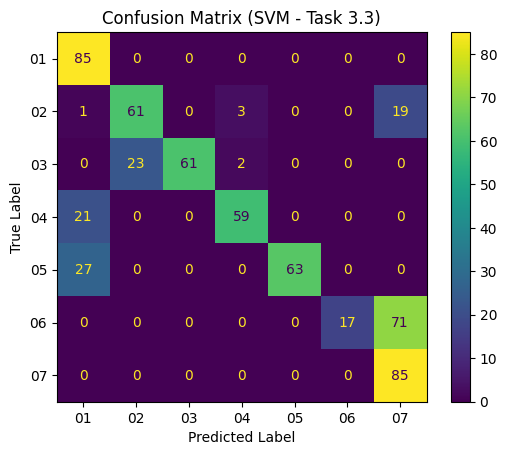


Evaluating Gaussian Naive Bayes Classifier...

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

          01       0.45      1.00      0.62        85
          02       0.50      0.06      0.11        84
          03       1.00      0.59      0.74        86
          04       1.00      0.35      0.52        80
          05       0.76      0.61      0.68        90
          06       0.77      1.00      0.87        88
          07       0.64      1.00      0.78        85

    accuracy                           0.66       598
   macro avg       0.73      0.66      0.62       598
weighted avg       0.73      0.66      0.62       598

Gaussian Naive Bayes Macro F1 Score: 0.62


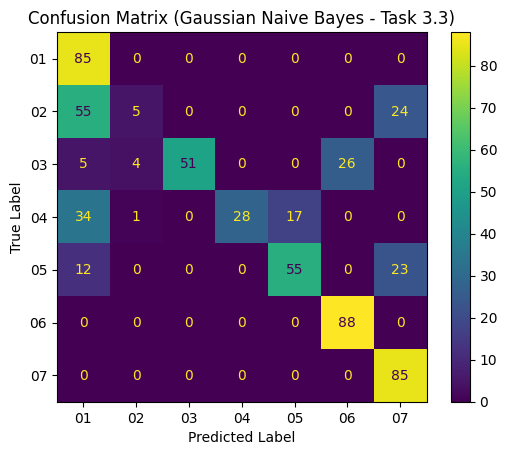


Final Results:
SVM - Macro F1 Score: 0.71
Gaussian Naive Bayes - Macro F1 Score: 0.62


In [10]:
# 3.3

### Your code begins here ###

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

class MultiModalClassifier:
    def __init__(self, train_features, test_features, train_labels, test_labels):
        self.train_features = train_features
        self.test_features = test_features
        self.train_labels = train_labels
        self.test_labels = test_labels

        self.scaler = MinMaxScaler()
        self.train_features_normalized = None
        self.test_features_normalized = None
        self.svm_classifier = None
        self.gnb_classifier = None

    def normalize_data(self):
        """Normalize the training and testing features."""
        self.train_features_normalized = self.scaler.fit_transform(self.train_features)
        self.test_features_normalized = self.scaler.transform(self.test_features)

    def train_svm(self):
        """Train an SVM classifier."""
        print("Training SVM classifier...")
        self.svm_classifier = SVC(kernel="rbf", class_weight="balanced", random_state=0)
        self.svm_classifier.fit(self.train_features_normalized, self.train_labels)

    def train_gnb(self):
        """Train a Gaussian Naive Bayes classifier."""
        print("Training Gaussian Naive Bayes classifier...")
        self.gnb_classifier = GaussianNB()
        self.gnb_classifier.fit(self.train_features_normalized, self.train_labels)

    def evaluate_classifier(self, classifier, classifier_name):
        """Evaluate a given classifier and plot the confusion matrix."""
        predictions = classifier.predict(self.test_features_normalized)
        conf_matrix = confusion_matrix(self.test_labels, predictions)
        f1 = f1_score(self.test_labels, predictions, average="macro")

        print(f"\n{classifier_name} Classification Report:")
        print(classification_report(self.test_labels, predictions))
        print(f"{classifier_name} Macro F1 Score: {f1:.2f}")

        ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(self.test_labels)).plot(
            cmap="viridis", values_format="d"
        )
        plt.title(f"Confusion Matrix ({classifier_name} - Task 3.3)")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

        return f1, conf_matrix

    def run(self):

        self.normalize_data()
        self.train_svm()
        self.train_gnb()

        print("\nEvaluating SVM Classifier...")
        svm_f1, svm_conf_matrix = self.evaluate_classifier(self.svm_classifier, "SVM")

        print("\nEvaluating Gaussian Naive Bayes Classifier...")
        gnb_f1, gnb_conf_matrix = self.evaluate_classifier(self.gnb_classifier, "Gaussian Naive Bayes")

        return {
            "SVM": {"f1_score": svm_f1, "conf_matrix": svm_conf_matrix},
            "Gaussian Naive Bayes": {"f1_score": gnb_f1, "conf_matrix": gnb_conf_matrix},
        }



assert train_combined_acc.shape[0] == train_pca_depth.shape[0], "Mismatch in training feature dimensions"
assert test_combined_acc.shape[0] == test_pca_depth.shape[0], "Mismatch in test feature dimensions"

# Combine accelerometer and depth features Multi Modal Training
train_combined_features = np.hstack([train_combined_acc, train_pca_depth])
test_combined_features = np.hstack([test_combined_acc, test_pca_depth])

assert train_combined_features.shape[0] == train_labels_acc.shape[0], "Mismatch between training data and labels"
assert test_combined_features.shape[0] == test_labels_acc.shape[0], "Mismatch between test data and labels"


print("Initializing Multi-Modal Classifier...")
mm_classifier = MultiModalClassifier(
    train_features=train_combined_features,
    test_features=test_combined_features,
    train_labels=train_labels_acc,
    test_labels=test_labels_acc,
)

results = mm_classifier.run()

print("\nFinal Results:")
for classifier_name, metrics in results.items():
    print(f"{classifier_name} - Macro F1 Score: {metrics['f1_score']:.2f}")

### Your code ends here ###



The results from Task 3.3 demonstrate the effectiveness of feature-level fusion for multi-modal classification, where features from accelerometer and depth data are combined into a unified representation. The fusion is achieved by horizontally stacking feature vectors extracted from both modalities, resulting in a comprehensive 86-dimensional feature space. Given their differing ranges and scales, this combined representation is then normalized using MinMaxScaler to fair contribution from both modalities.since the raw features alone cannot determine the relationship between input data and output labels (exercise classes) we incoperated well known classifiers SVM and GNB.

After the training, the classifiers performances clearly distinguish how they handle this fused dataset. The SVM classifier achieved an F1 score of 0.71, outperforming the Gaussian Naive Bayes (GNB) classifier, which attained an F1 score of 0.62. This difference could be due to their underlying mechanisms. in this task, we used defult hyperparaeters for the training to show fair comparison between two classifers. with its RBF kernel, SVM is better at handling non-linear relationships within high-dimensional fused feature space, effectively using the combined accelerometer and depth data. In contrast, GNB assumes feature independence, which may not hold true in this context where the interactions of modalities are key to accurate classification.

Overall, the results denotes the strength of feature-level fusion for integrating multi-modal data and the importance of selecting classifiers that align with the dataset's complexity.

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$.<br>
Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>

Note: Normalize the data along each axis.
<br>

Document your work, answer the given question, evaluate the results, and analyse the outcomes.
    
</div>

Training on accelerometer features...
Performing GridSearchCV for SVM...
Best parameters for SVM: {'C': 100.0, 'gamma': 2.0, 'kernel': 'rbf'}
Performing GridSearchCV for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 1000}

Training final models with best parameters...

SVM Classification Report:
              precision    recall  f1-score   support

          01       0.88      0.67      0.76        85
          02       0.32      0.50      0.39        84
          03       1.00      0.15      0.26        86
          04       1.00      0.95      0.97        80
          05       0.86      0.66      0.74        90
          06       0.55      0.81      0.65        88
          07       0.73      0.98      0.84        85

    accuracy                           0.67       598
   macro avg       0.76      0.67      0.66       598
weighted avg       0.76      0.67      0.66       598



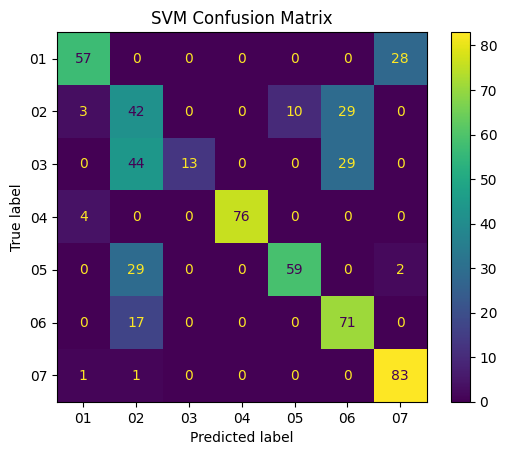


AdaBoost Classification Report:
              precision    recall  f1-score   support

          01       0.74      1.00      0.85        85
          02       0.06      0.06      0.06        84
          03       0.00      0.00      0.00        86
          04       1.00      0.56      0.72        80
          05       0.56      0.64      0.60        90
          06       0.64      0.65      0.64        88
          07       0.51      0.93      0.66        85

    accuracy                           0.55       598
   macro avg       0.50      0.55      0.50       598
weighted avg       0.50      0.55      0.50       598



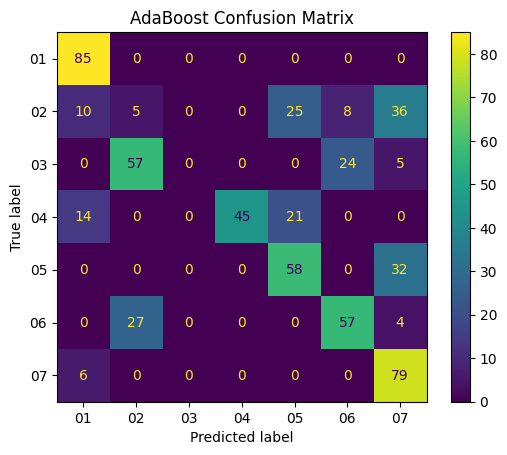


Training on depth features...
Performing GridSearchCV for SVM...
Best parameters for SVM: {'C': 100.0, 'gamma': 0.25, 'kernel': 'rbf'}
Performing GridSearchCV for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 0.75, 'n_estimators': 1000}

Training final models with best parameters...

SVM Classification Report:
              precision    recall  f1-score   support

          01       0.26      0.94      0.41        85
          02       0.91      0.58      0.71        84
          03       0.83      0.57      0.68        86
          04       0.00      0.00      0.00        80
          05       1.00      0.04      0.09        90
          06       1.00      0.32      0.48        88
          07       0.59      1.00      0.74        85

    accuracy                           0.49       598
   macro avg       0.65      0.49      0.44       598
weighted avg       0.66      0.49      0.44       598



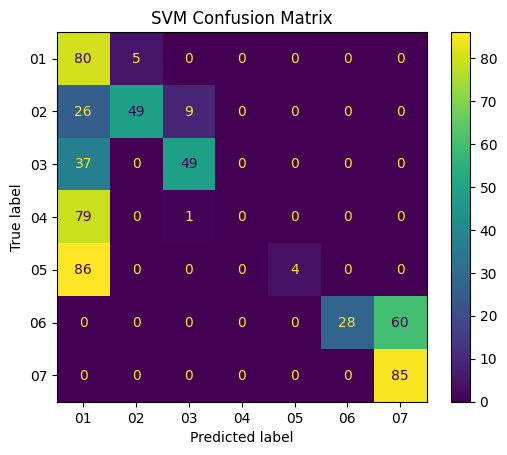


AdaBoost Classification Report:
              precision    recall  f1-score   support

          01       0.20      0.88      0.33        85
          02       0.86      0.07      0.13        84
          03       0.00      0.00      0.00        86
          04       0.37      0.12      0.19        80
          05       1.00      0.11      0.20        90
          06       0.48      0.83      0.61        88
          07       0.37      0.13      0.19        85

    accuracy                           0.31       598
   macro avg       0.47      0.31      0.24       598
weighted avg       0.47      0.31      0.24       598



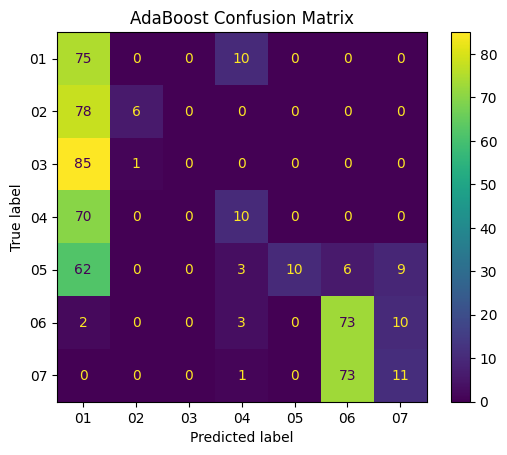

In [11]:
# 4.1

### Your code begins here ###

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

class ClassifierTrainer:
    def __init__(self, train_features, test_features, train_labels, test_labels, param_grid_svm, param_grid_adaboost):
        self.train_features = train_features
        self.test_features = test_features
        self.train_labels = train_labels
        self.test_labels = test_labels
        self.param_grid_svm = param_grid_svm
        self.param_grid_adaboost = param_grid_adaboost

        self.scaler = MinMaxScaler()
        self.train_features_norm = None
        self.test_features_norm = None
        self.svm_model = None
        self.adaboost_model = None
        self.svm_final = None
        self.adaboost_final = None

    def normalize_data(self):
        """Normalize the training and testing features."""
        self.train_features_norm = self.scaler.fit_transform(self.train_features)
        self.test_features_norm = self.scaler.transform(self.test_features)

    def perform_grid_search(self, classifier, param_grid, scoring="f1_macro"):
        """Perform GridSearchCV for hyperparameter tuning."""
        grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=scoring)
        grid_search.fit(self.train_features_norm, self.train_labels)
        return grid_search

    def train_svm(self):
        """Train an SVM classifier using GridSearchCV."""
        print("Performing GridSearchCV for SVM...")
        self.svm_model = self.perform_grid_search(SVC(probability=True), self.param_grid_svm)
        print("Best parameters for SVM:", self.svm_model.best_params_)

    def train_adaboost(self):
        """Train an AdaBoost classifier using GridSearchCV."""
        print("Performing GridSearchCV for AdaBoost...")
        self.adaboost_model = self.perform_grid_search(AdaBoostClassifier(random_state=0), self.param_grid_adaboost)
        print("Best parameters for AdaBoost:", self.adaboost_model.best_params_)

    def train_final_models(self):
        """Train the final SVM and AdaBoost models using the best parameters."""
        print("\nTraining final models with best parameters...")

        # SVM final model
        self.svm_final = SVC(probability=True, **self.svm_model.best_params_)
        self.svm_final.fit(self.train_features_norm, self.train_labels)
        svm_preds = self.svm_final.predict(self.test_features_norm)

        print("\nSVM Classification Report:")
        print(classification_report(self.test_labels, svm_preds, zero_division=0))
        svm_cm = confusion_matrix(self.test_labels, svm_preds)
        ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=np.unique(self.test_labels)).plot(
            cmap="viridis", values_format="d"
        )
        plt.title("SVM Confusion Matrix")
        plt.show()

        # AdaBoost final model
        self.adaboost_final = AdaBoostClassifier(random_state=0, **self.adaboost_model.best_params_)
        self.adaboost_final.fit(self.train_features_norm, self.train_labels)
        adaboost_preds = self.adaboost_final.predict(self.test_features_norm)


        print("\nAdaBoost Classification Report:")
        print(classification_report(self.test_labels, adaboost_preds, zero_division=0))
        adaboost_cm = confusion_matrix(self.test_labels, adaboost_preds)
        ConfusionMatrixDisplay(confusion_matrix=adaboost_cm, display_labels=np.unique(self.test_labels)).plot(
            cmap="viridis", values_format="d"
        )
        plt.title("AdaBoost Confusion Matrix")
        plt.show()

    def predict_probabilities(self):
            """Predict probabilistic outputs for both classifiers."""
            print("\nPredicting probabilities...")
            prob_svm = self.svm_final.predict_proba(self.test_features_norm)
            prob_adaboost = self.adaboost_final.predict_proba(self.test_features_norm)

            return prob_svm, prob_adaboost


# Hyperparameter grids for SVM
param_grid_svm = {
    "C": [0.1, 1.0, 10.0, 100.0],
    "gamma": [0.1, 0.25, 0.5, 0.75, 1.0, 2.0],
    "kernel": ["rbf"],
}
# Hyperparameter grids for AdaBoost
param_grid_adaboost = {
    "n_estimators": [50, 100, 500, 1000],
    "learning_rate": [0.1, 0.25, 0.5, 0.75, 1.0],
}

# Accelerometer training, testing, and confusion matrix plotting
print("Training on accelerometer features...")
acc_trainer = ClassifierTrainer(
    train_combined_acc,  # From Task 3.1
    test_combined_acc,   # From Task 3.1
    train_labels_acc,
    test_labels_acc,
    param_grid_svm,
    param_grid_adaboost,
)
acc_trainer.normalize_data()
acc_trainer.train_svm()
acc_trainer.train_adaboost()
acc_trainer.train_final_models()

# Depth training, testing, and confusion matrix plotting
print("\nTraining on depth features...")
dc_trainer = ClassifierTrainer(
    train_pca_depth,  # From Task 3.2
    test_pca_depth,   # From Task 3.2
    train_labels_dc,
    test_labels_dc,
    param_grid_svm,
    param_grid_adaboost,
)
dc_trainer.normalize_data()
dc_trainer.train_svm()
dc_trainer.train_adaboost()
dc_trainer.train_final_models()


### Your code ends here ###



Yes, there is a possibility that classifiers may overfit to the training data using this parameter selection strategy. GridSearchCV optimizes hyperparameters (e.g., C and gamma for SVM, n_estimators and learning_rate for AdaBoost) by maximizing performance during cross-validation. While cross-validation helps mitigate overfitting, it does not guarantee that the selected parameters will generalize well to unseen data, especially if the training dataset lacks diversity or does not adequately represent the problem's complexity. High C values or low gamma values in SVM and high n_estimators or learning_rate in AdaBoost can result in overly complex models that fit the training data too tightly, leading to poor performance on test data.

The results from Task 4.1 provide evidence of this risk. While SVM performs reasonably well on accelerometer features, its performance varies significantly across classes, with Class 03 showing particularly poor results. Similarly, AdaBoost performs poorly on depth features overall, with low F1 scores and variability across classes. This suggests that both classifiers may have overfit to specific patterns in the training data, which do not generalize well to the test set. These observations highlight that, while grid search is a powerful tool for parameter optimization, it cannot fully prevent overfitting, particularly when the dataset is small or lacks sufficient variability.

<a id='task4'></a>
<div class=" alert alert-warning">


<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [12]:
# 4.2 - Probabilistic Predictions and Evaluation

### Your code begins here ###

prob_svm_acc, prob_adaboost_acc = acc_trainer.predict_probabilities()
prob_svm_dc, prob_adaboost_dc = dc_trainer.predict_probabilities()

print("\nProbabilistic outputs for accelerometer features (SVM):", prob_svm_acc)
print("\nProbabilistic outputs for accelerometer features (AdaBoost):", prob_adaboost_acc)
print("\nProbabilistic outputs for depth features (SVM):", prob_svm_dc)
print("\nProbabilistic outputs for depth features (AdaBoost):", prob_adaboost_dc)

### Your code ends here ###



Predicting probabilities...

Predicting probabilities...

Probabilistic outputs for accelerometer features (SVM): [[9.88508064e-01 1.87570503e-03 1.06210390e-03 ... 1.80913731e-03
  1.20092956e-03 2.67082698e-03]
 [9.89977324e-01 1.00424201e-03 9.90999221e-04 ... 1.36725601e-03
  1.28934095e-03 2.62141230e-03]
 [9.87767237e-01 5.12160214e-03 2.22948052e-03 ... 9.71270888e-04
  1.33137671e-03 1.31641136e-03]
 ...
 [1.08866654e-01 2.42754548e-02 2.81566786e-03 ... 4.66788790e-03
  3.11114658e-03 7.28879137e-01]
 [2.70420491e-01 1.08265190e-02 2.74355459e-03 ... 3.75743865e-03
  2.53690613e-03 5.45061642e-01]
 [1.04064690e-01 7.36688659e-02 6.53514829e-03 ... 1.05834719e-02
  7.22958426e-03 6.84567799e-01]]

Probabilistic outputs for accelerometer features (AdaBoost): [[0.14537299 0.14301767 0.1441134  ... 0.1409923  0.14296128 0.1445367 ]
 [0.14537303 0.1429626  0.14374341 ... 0.14105017 0.14307476 0.14479033]
 [0.14537289 0.14299053 0.14408629 ... 0.1409922  0.14293482 0.1446177 ]
 ...

<a id='task4'></a>
<div class=" alert alert-warning">
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

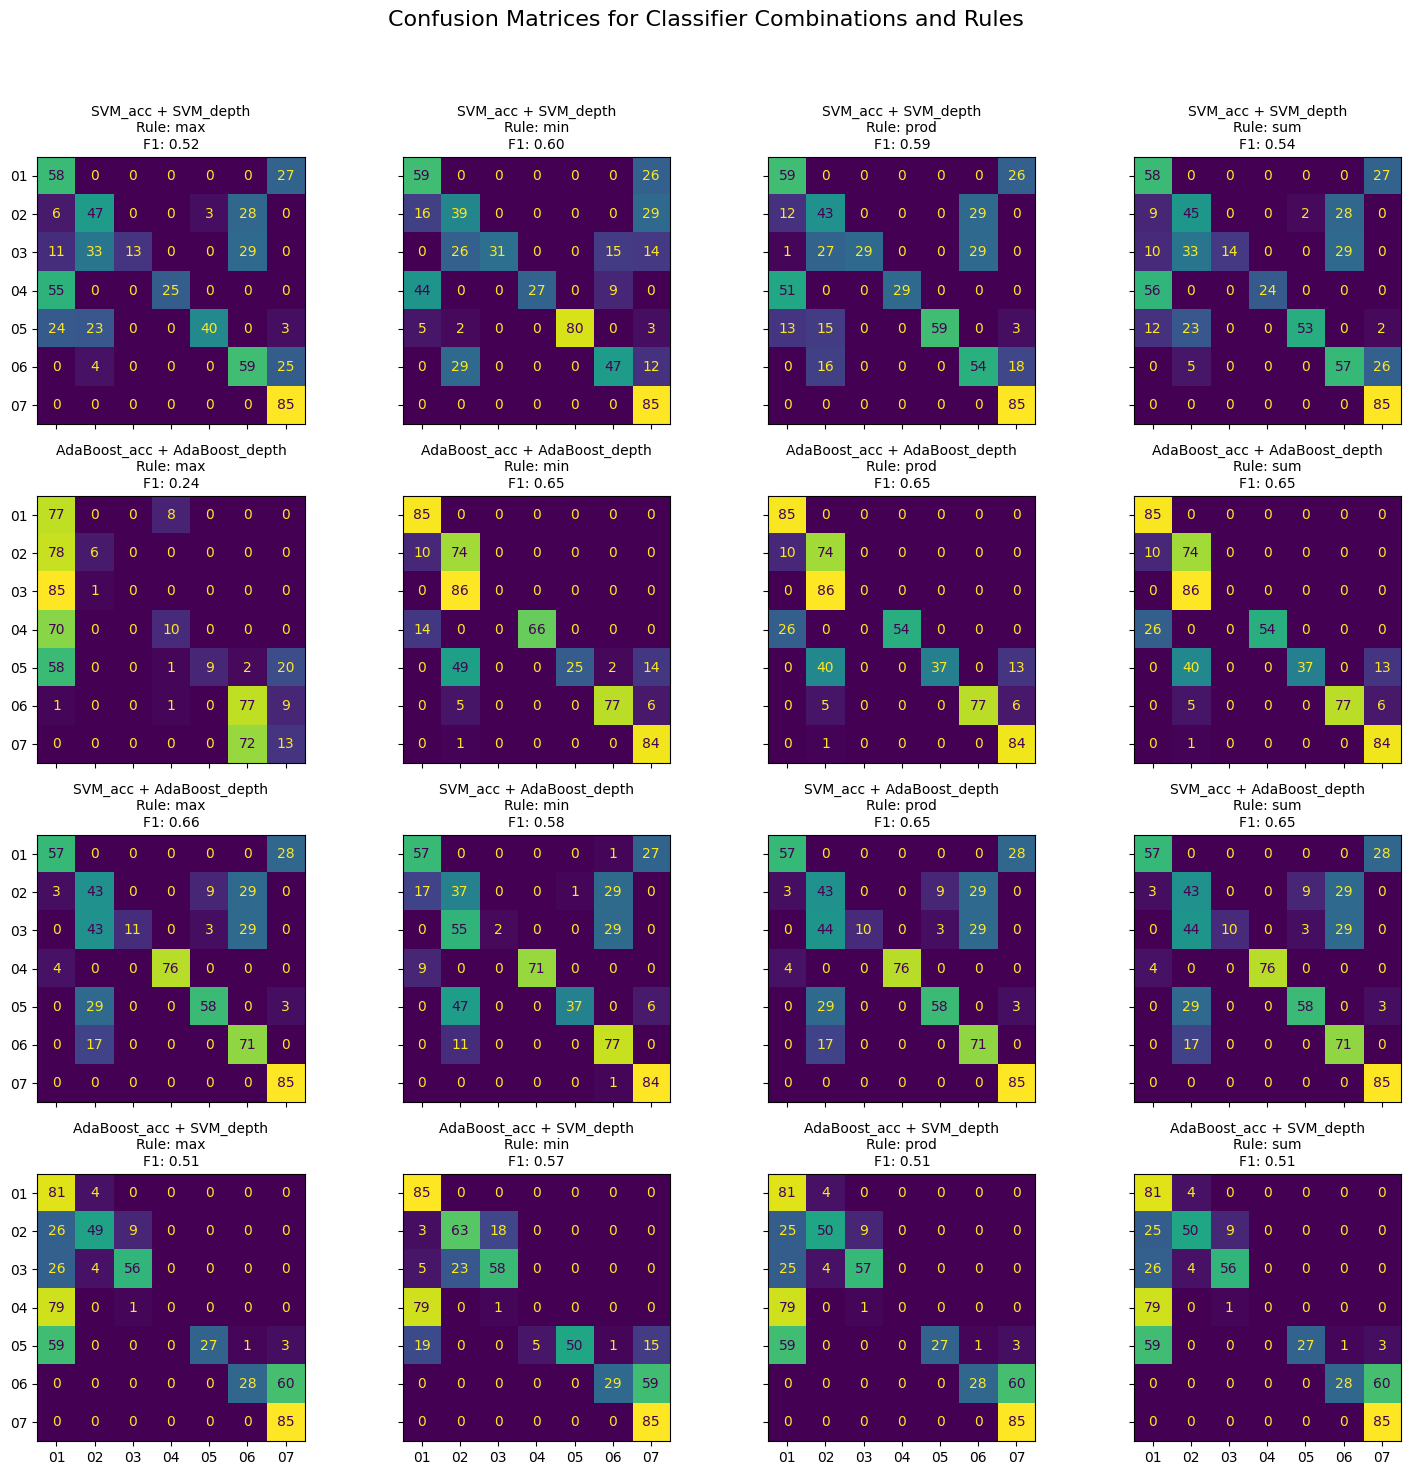

In [13]:
# 4.3 - Visualize All Confusion Matrices in a Grid Format

### Your code begins here ###
class ProbabilityCombiner:
    def max_combine(self, prob1, prob2):
        return np.maximum(prob1, prob2)

    def min_combine(self, prob1, prob2):
        return np.minimum(prob1, prob2)

    def prod_combine(self, prob1, prob2):
        return prob1 * prob2

    def sum_combine(self, prob1, prob2):
        return prob1 + prob2


def evaluate_combination_grid(combination_name, rule_name, strategy, prob1, prob2, test_labels):
    combined_prob = strategy(prob1, prob2)
    predicted_labels = [f"{int(label) + 1:02d}" for label in np.argmax(combined_prob, axis=1)]
    cm = confusion_matrix(test_labels, predicted_labels, labels=np.unique(test_labels))
    f1 = classification_report(test_labels, predicted_labels, output_dict=True, zero_division=0)['macro avg']['f1-score']

    return cm, f1


# Classifier combinations
classifier_combinations = {
    "SVM_acc + SVM_depth": (prob_svm_acc, prob_svm_dc),
    "AdaBoost_acc + AdaBoost_depth": (prob_adaboost_acc, prob_adaboost_dc),
    "SVM_acc + AdaBoost_depth": (prob_svm_acc, prob_adaboost_dc),
    "AdaBoost_acc + SVM_depth": (prob_adaboost_acc, prob_svm_dc)
}

rule_cmb = ProbabilityCombiner()
rules = {
    "max": rule_cmb.max_combine,
    "min": rule_cmb.min_combine,
    "prod": rule_cmb.prod_combine,
    "sum": rule_cmb.sum_combine
}

n_combinations = len(classifier_combinations)
n_rules = len(rules)
fig, axes = plt.subplots(n_combinations, n_rules, figsize=(15, 15))
fig.suptitle("Confusion Matrices for Classifier Combinations and Rules", fontsize=16)

for row_idx, (combination_name, (prob1, prob2)) in enumerate(classifier_combinations.items()):
    for col_idx, (rule_name, strategy) in enumerate(rules.items()):
        cm, f1 = evaluate_combination_grid(combination_name, rule_name, strategy, prob1, prob2, test_labels_acc)


        ax = axes[row_idx, col_idx]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels_acc))
        disp.plot(ax=ax, cmap="viridis", values_format="d", colorbar=False)
        ax.set_title(f"{combination_name}\nRule: {rule_name}\nF1: {f1:.2f}", fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("")

for ax in axes.flat:
    ax.label_outer()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Your code ends here ###


In task 4, we trained SVM and Adaboost classifiers on the features we obtained from tasks 3.1 and 3.2. Since this whole task is about decision-level fusion, we obtained the probabilities after the training. Then, we combined each classifier into different pairs to evaluate the results. We used a probabilistic rule-based approach to understand the improvement of the results. The combination of SVM_acc and AdaBoost_depth is the best-performing approach, consistently achieving the highest F1 score of 0.66 across various fusion rules, including max, prod, and sum. In contrast, AdaBoost_acc and AdaBoost_depth underperform, with F1 scores often falling below 0.24, indicating inefficiency. except for this combination all other combinations fairly achived a good F1 scores.

Theoretically, the success of the max and prod rules aligns with their strong classifier confidence aggregation. The max rule selects the highest probability among classifiers, favoring confident predictions, while the prod rule amplifies joint confidence, assuming sensor independence. This explains their performance in balancing contributions from accelerometer and depth camera data.

sum and prod demonstrated the most effective, strong classifier confidence among the fusion rules, leading to higher F1 scores. However, the min rule consistently falls short, likely due to its tendency to lower probabilities. Certain classes, such as Class 04 and Class 05, remain challenging across all combinations, suggesting a need for improvements such as more hyper parameter tuning or using of a different classifer which matches with the data. These results emphasize the importance of selecting the right combinations of classifiers and fusion rules to optimize multi-modal classification. The SVM_acc + AdaBoost_depth combination, trained with the best hyperparameters and the max rule, offers the best balance between accelerometer and depth data modalities.

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br>
<br>
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br>
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [14]:
# 5.1

### Your code begins here ###

### Your code ends here ###

<a id='task5'></a>
<div class=" alert alert-warning">

<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [15]:
# 5.2

### Your code begins here ###

### Your code ends here ###